## Import Libraries

In [15]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

## Exploratory Data Analysis

In [3]:
df = pd.read_csv('df_final.csv')

In [4]:
df['Data'] = pd.to_datetime(df['Data'])

In [19]:
df['dia'] = df['Data'].dt.day
df['dia_da_semana'] = pd.to_datetime(df['Data']).dt.day_name().astype(str)

### Metrics distribution for each feature

- Visualização da variação estatística em cada feature

In [6]:
df.drop(columns=['Hora', 'ano', 'mes']).describe()

,hourly_demand,"PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)","PRECIPITAÇÃO TOTAL, HORÁRIO (mm)",populacao_dia,industria_geral,industria_extrativa,industria_transformacao
count,37943.000000,37943.000000,37943.000000,37943.000000,37943.000000,37943.000000,37943.000000,37943.000000,37943.000000,37943.000000,37943.000000,37943.000000,37943.000000,37943.000000,37943.000000,37943.000000,37943.000000,37943.000000,3.794300e+04,37943.000000,37943.000000,37943.000000
mean,63986.662763,968.737479,969.019431,968.428845,806.428584,24.032003,18.079458,24.710762,23.402302,18.643535,17.557607,76.010279,70.330755,73.215679,160.728990,4.680350,1.872775,43.337090,2.090527e+08,86.481807,94.892599,85.393640
std,8968.332772,8.528625,8.480939,8.513175,915.452518,3.138572,2.486965,3.353881,3.019927,2.422658,2.591131,13.494790,15.309003,14.517404,20.184088,1.510778,0.645950,53.181692,1.732754e+06,4.583069,6.762284,5.066479
min,0.000000,926.050000,926.275000,925.950000,0.000000,13.365789,8.597964,13.966667,12.447046,9.093151,7.813575,34.680233,30.023256,32.344920,55.857143,0.750000,0.100000,0.000000,2.060858e+08,64.900000,79.600000,61.000000
25%,56973.956500,963.004258,963.334030,962.723572,88.208947,21.830000,16.580861,22.246211,21.359933,17.105959,16.038358,65.485800,57.121269,61.158583,146.497871,3.435917,1.360447,6.000000,2.077318e+08,86.300000,89.100000,85.000000
50%,64480.267000,966.519457,966.839767,966.244043,243.933333,23.582035,18.761124,24.272000,23.130556,19.337805,18.188651,79.750000,73.125000,76.440000,160.000000,4.516210,1.822222,22.800000,2.087710e+08,87.400000,94.000000,86.300000
75%,70846.152000,973.737879,973.943982,973.381385,1596.851064,26.512149,19.971153,27.456383,25.693394,20.516686,19.504571,87.818182,84.315789,86.316431,173.953756,5.896203,2.351197,60.400000,2.105482e+08,88.600000,101.900000,87.800000
max,90120.004000,1002.900000,1002.816667,1002.266667,3299.940659,34.145029,23.547059,34.912281,33.352924,23.811765,23.182353,97.333333,97.000000,97.000000,302.285714,11.010000,4.687500,486.200000,2.122692e+08,91.300000,104.000000,91.200000


### Visualização de distribuições

In [7]:
features = ['PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)', 'RADIACAO GLOBAL (Kj/m²)', 'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)',
            'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)', 'VENTO, RAJADA MAXIMA (m/s)', 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)', 'populacao_dia',
            'industria_geral', 'industria_extrativa', 'industria_transformacao', 'hourly_demand']

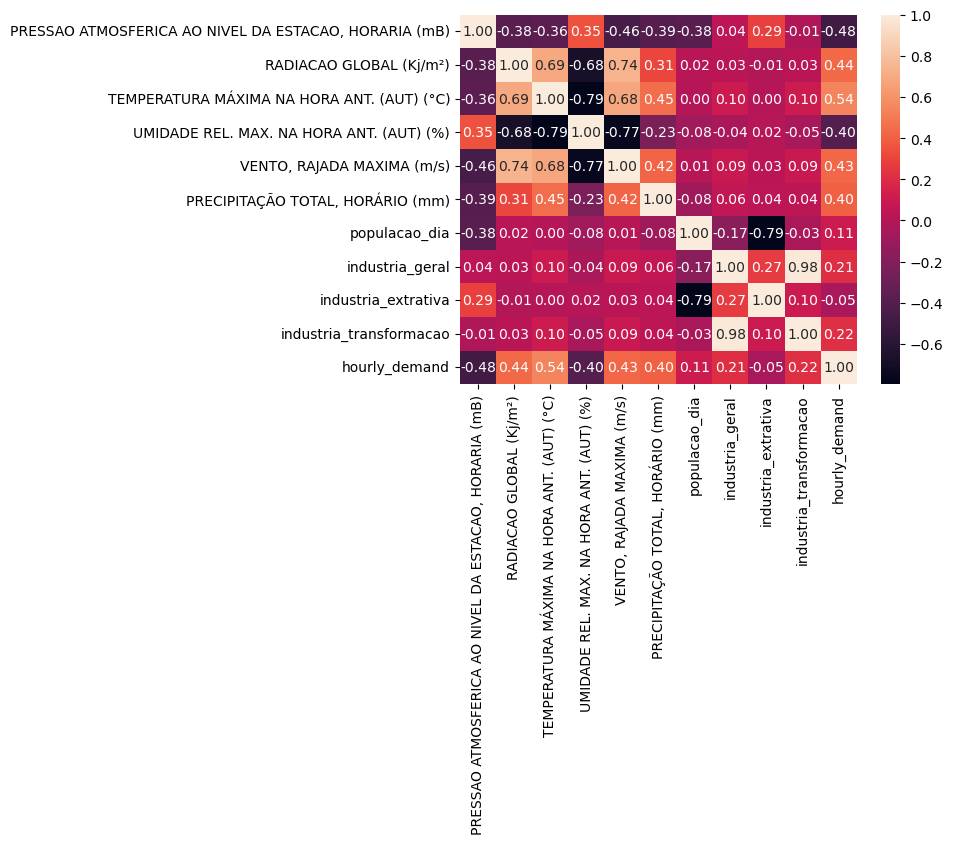

In [10]:
ax = sns.heatmap(df[features].corr(), annot=True, fmt='.2f')

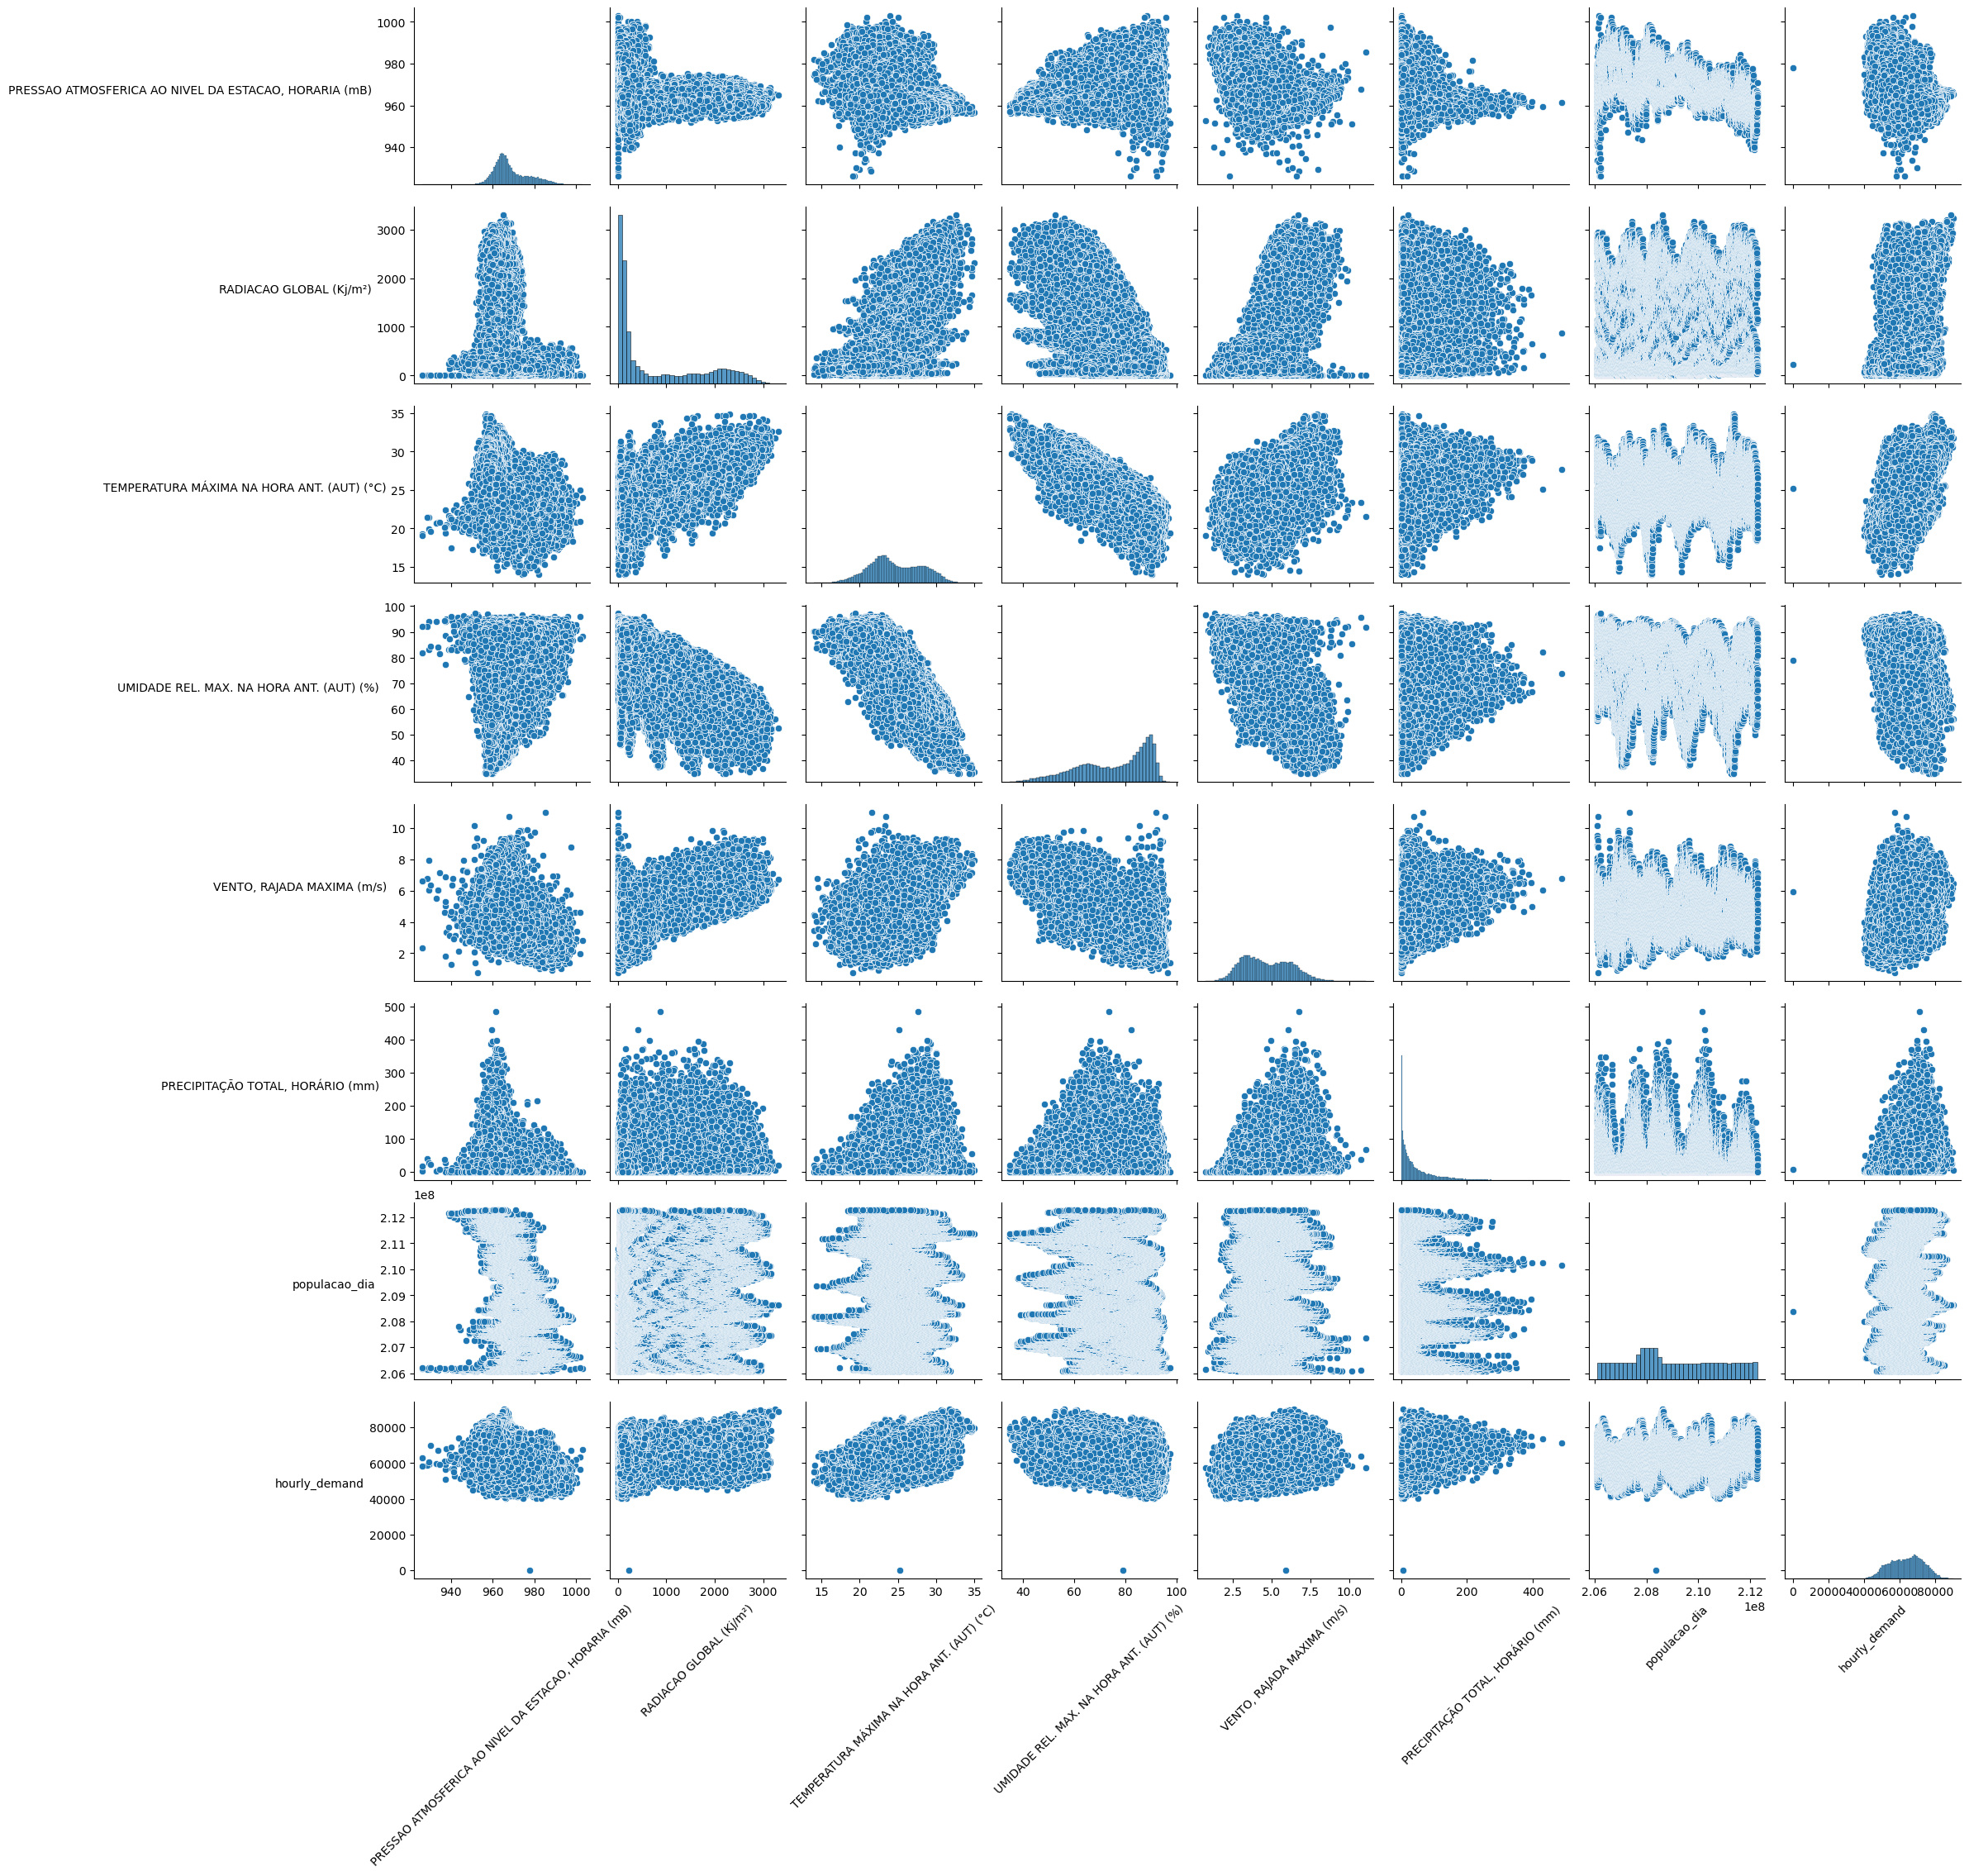

In [20]:
g = sns.pairplot(df[features])

for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 45)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 0)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')

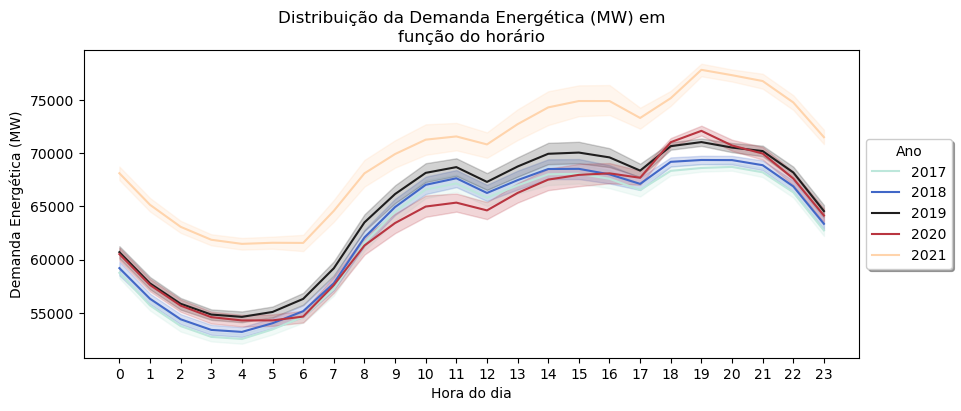

In [26]:
plt.figure(figsize=(10,4))

ax = sns.lineplot(data=df, x='Hora', y='hourly_demand', hue='ano', palette = 'icefire')

ax.set(xlabel='Hora do dia', ylabel='Demanda Energética (MW)', title='Distribuição da Demanda Energética (MW) em\nfunção do horário')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True, title = 'Ano')
ax.set_xticks(range(0,24));

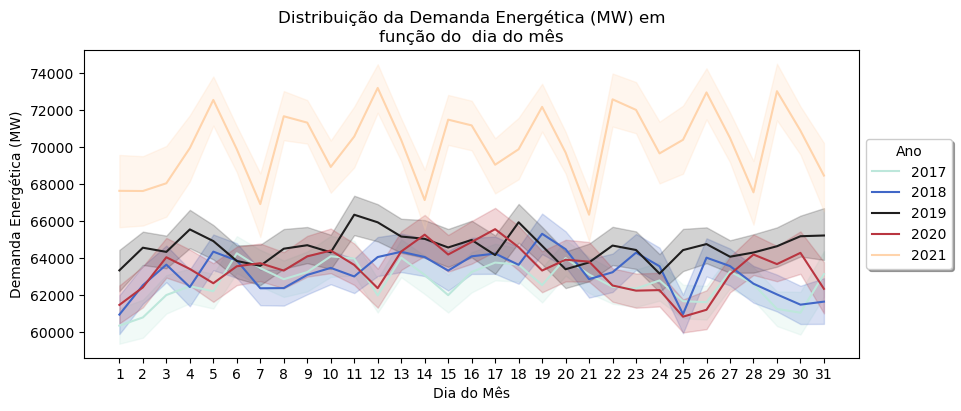

In [27]:
plt.figure(figsize=(10,4))

ax = sns.lineplot(data=df, x='dia', y='hourly_demand', hue='ano', palette = 'icefire')

ax.set(xlabel='Dia do Mês', ylabel='Demanda Energética (MW)', title='Distribuição da Demanda Energética (MW) em\nfunção do  dia do mês')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True, title = 'Ano')
ax.set_xticks(range(1,32));

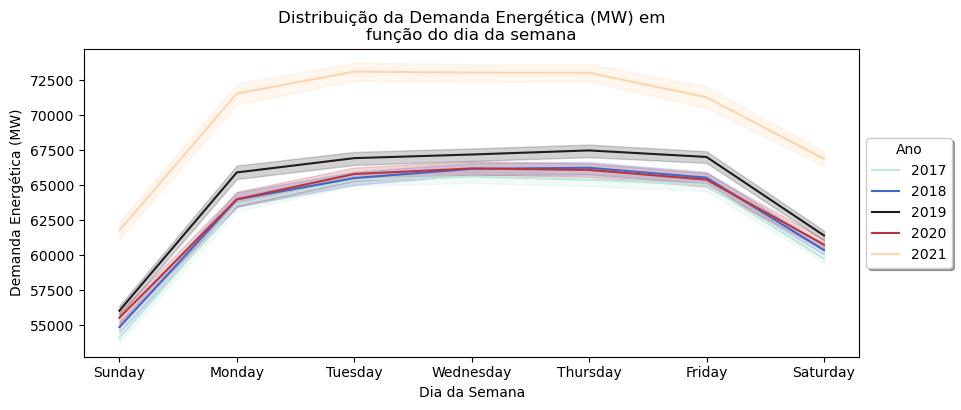

In [29]:
plt.figure(figsize=(10,4))

ax = sns.lineplot(data=df, x='dia_da_semana', y='hourly_demand', hue='ano', palette = 'icefire')

ax.set(xlabel='Dia da Semana', ylabel='Demanda Energética (MW)', title='Distribuição da Demanda Energética (MW) em\nfunção do dia da semana')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True, title = 'Ano')
ax.set_xticks(range(0,7));